In [495]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [496]:
df=pd.read_excel(r"C:\Users\Arun Dominic Savio\Documents\Documents\code basics\pdm.xlsx")

In [497]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [498]:
df.shape

(10000, 10)

In [499]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [500]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [501]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [502]:
#we can drop "product id","udi"becouse thses are not relevant
df=df.drop(["Product ID","UDI"],axis=1)

In [503]:
df.tail()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,M,299.0,308.7,1500,40.2,30,0,No Failure


In [504]:
df["Type"].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [505]:
df["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [506]:
df["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

# EDA

In [507]:
df.shape

(10000, 8)

In [508]:
#performing eda to find the hidden patterns, trends and relationships between variables

In [509]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [510]:
type(df["Target"])

pandas.core.series.Series

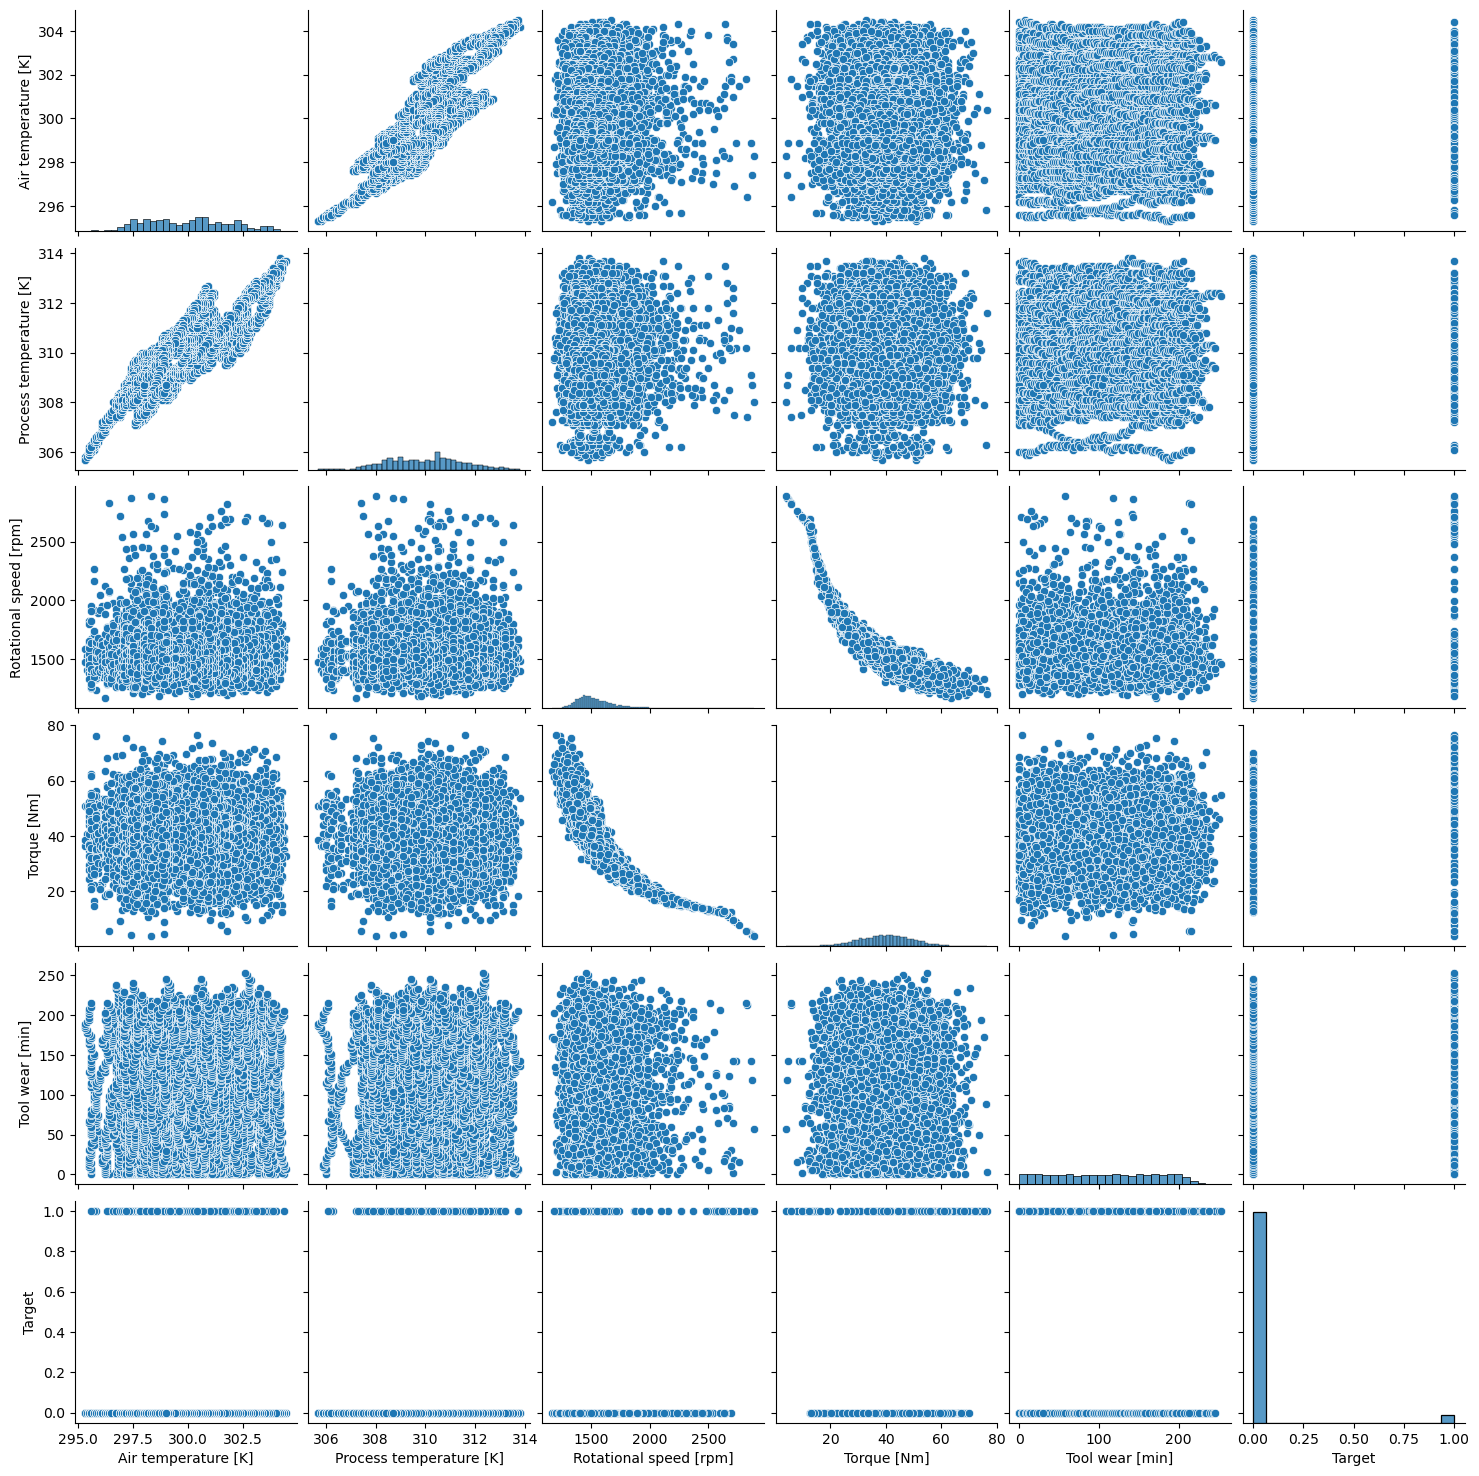

In [511]:
sns.pairplot(df)

In [512]:
#A pair plot is a useful visualization tool for exploring pairwise relationships between numerical variables in a dataset.
#It creates a grid of scatterplots and histograms for each pair of variables to help you understand their correlations and distributions.

<Axes: xlabel='Failure Type', ylabel='count'>

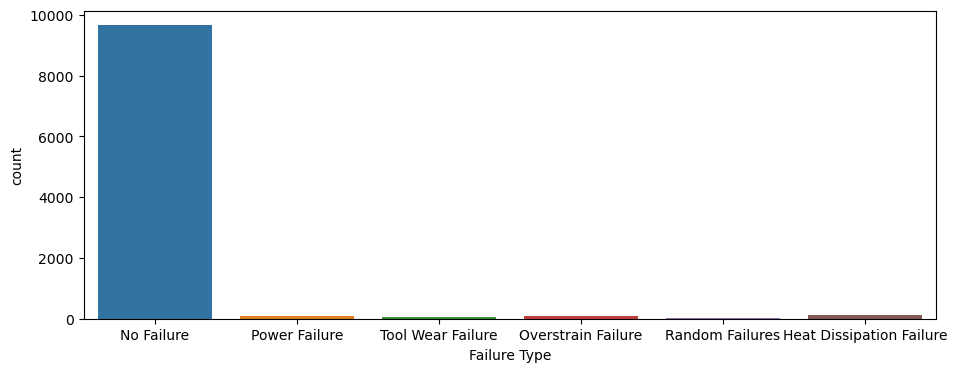

In [513]:
plt.figure(figsize=(11,4))
sns.countplot(data=df,x="Failure Type")

In [514]:
# The x-axis of the plot represents the different categories or values in the "Failure Type" column, and the y-axis represents the count of each category.
#Frequency of Failure Types: here we can  quickly see which failure types are the most common and which are less common based on the height of the bars. 
#here the "No failure" category has a significantly higher count than the others, it suggests that "No Failure"type are more frequent.
#here there is of case of class imbalance in the data  becouse the count of all other Failure types are very less compared to"No Failure". 
#the reason may be due to insufficient or incomplete data.

<Axes: xlabel='Type', ylabel='count'>

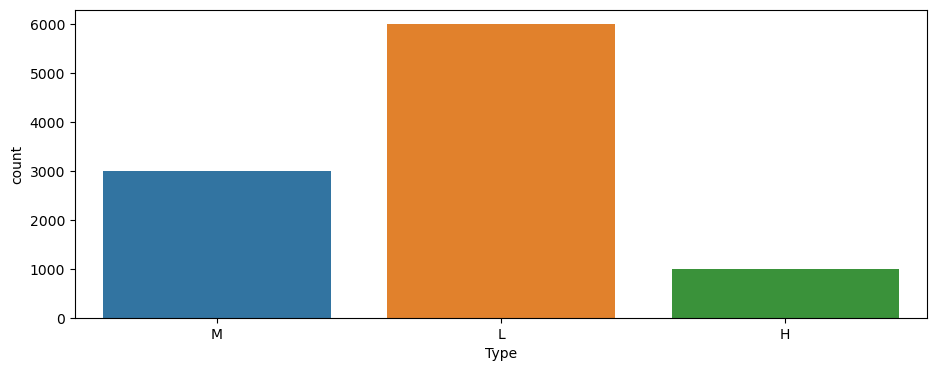

In [515]:
plt.figure(figsize=(11,4))
sns.countplot(data=df,x="Type")

In [516]:
# in above count plot the x axis shows different types of machines here "L" for low failure 'M'for medium failure and "H" for high failure
#the count plot shows most of the machines the failure type is very low there is no immediate maintanance required for these kind of machines
#the machines require emergency maintanance (H) is very less compared to  L and M 

<Axes: xlabel='Target', ylabel='count'>

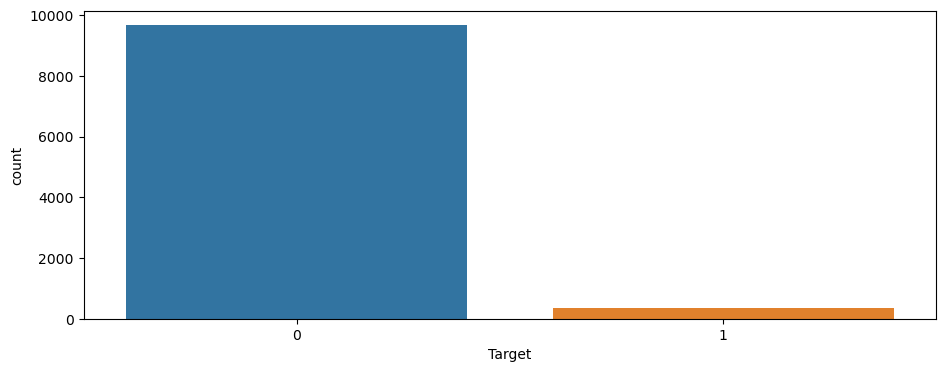

In [517]:
plt.figure(figsize=(11,4))
sns.countplot(data=df,x="Target")


In [518]:
#here x axis represents  the "Target" and which includes two categories 0 shows " No Failure" and 1 shows"Failure"
# the count of "No failure" is very high and around 9000, but the number of machine with failure is very less
#this is a case of class imbalance and it arises becouse the data is insufficient, majority of the records in failure category are missing or incomplete 

<Axes: xlabel='Air temperature [K]', ylabel='Count'>

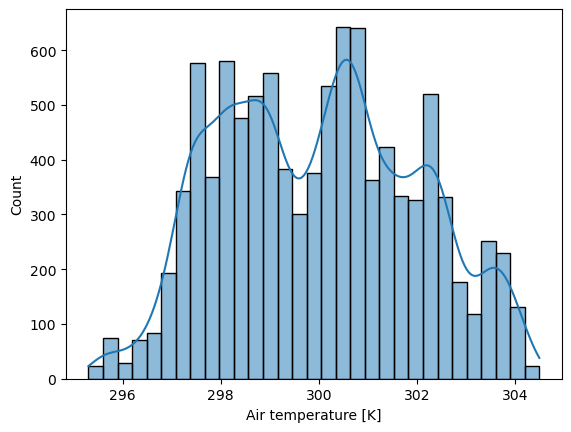

In [519]:
sns.histplot(df["Air temperature [K]"],kde=True)


In [520]:
df["Air temperature [K]"].mean()

300.00493

In [521]:
df["Air temperature [K]"].median()

300.1

In [522]:
df["Air temperature [K]"].std()

2.0002586829157574

In [523]:
300.00493+3*2.0002586829157574

306.0057060487473

In [524]:
#here the histogram shows the distribution of Air temprature data points
#the mean is around 300,standard deviation is approx 2 
#here the mean>median , so the distribution is right skewed
# and it is a multimodel distribution
# the histogram shows multiple peaks,it suggests that the data may have multiple modes or distinct subgroups with different temperature characteristics.

<Axes: xlabel='Rotational speed [rpm]', ylabel='Count'>

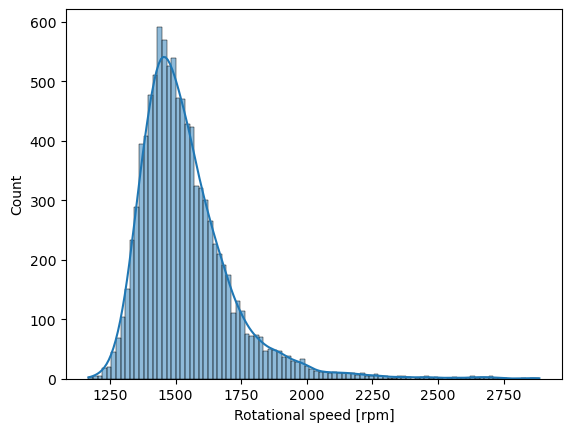

In [525]:
sns.histplot(df["Rotational speed [rpm]"],kde=True)


In [526]:
df["Rotational speed [rpm]"].mean()

1538.7761

In [527]:
df["Rotational speed [rpm]"].std()

179.28409591342628

In [528]:
df["Rotational speed [rpm]"].median()

1503.0

In [529]:
1538.7761+3*179.28409591342628

2076.628387740279

In [530]:
# here the histogram shows the distribution of the Rotational speed in the data and the distribution is Right skewed 
#becouse the  tailpart is extend towards the right side and most of the data points are concentrated towards the left
#the mean of the distribution is around 1538, standard deviation is 179 and there are outliers present in the right tail
#the data points beyond 2076 are considered outliers here

<Axes: xlabel='Torque [Nm]', ylabel='Count'>

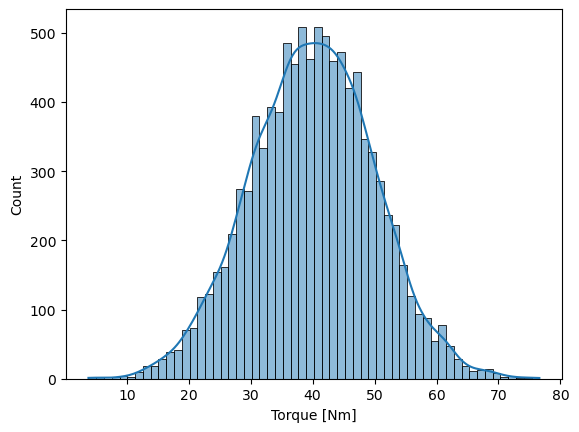

In [531]:
sns.histplot(df["Torque [Nm]"],kde=True)
# the distribution of data points are almost symmetrical 

In [532]:
df["Torque [Nm]"].mean()

39.986909999999995

In [533]:
df["Torque [Nm]"].median()

40.1

In [534]:
df["Torque [Nm]"].std()

9.968933725121401

In [535]:
39.986909999999995+3*9.968933725121401

69.89371117536419

In [536]:
# here the data distribution of torque is  almost normally distributed
# mean is around 39.9 and median is 40.1, these are almost equal so it is quite normally distributed and std is 9.96
# it shows a bell shaped curve, indicating most of  the data points are concentrated around the mean 

<Axes: xlabel='Process temperature [K]', ylabel='Count'>

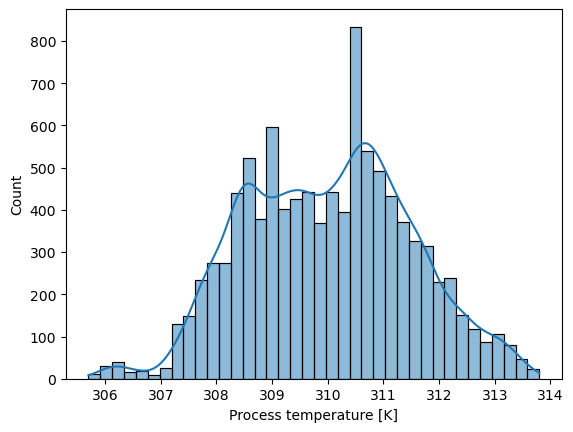

In [537]:
sns.histplot(df["Process temperature [K]"],kde=True)


<Axes: xlabel='Tool wear [min]', ylabel='Count'>

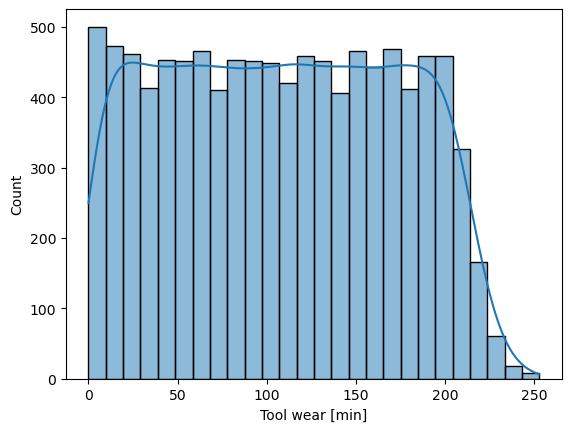

In [538]:
sns.histplot(df["Tool wear [min]"],kde=True)

In [539]:
# here we plot the data distribution of the "Tool wear" feature
# the kurtosis is very flat ,ie there is less concentration of data around the central value.
# this platykurtic distribution is a type of probability distribution characterized by a low kurtosis value, which indicates that it has thinner tails and a flatter peak compared to a normal distribution

In [540]:
# consider log transformations to make it more normal-like

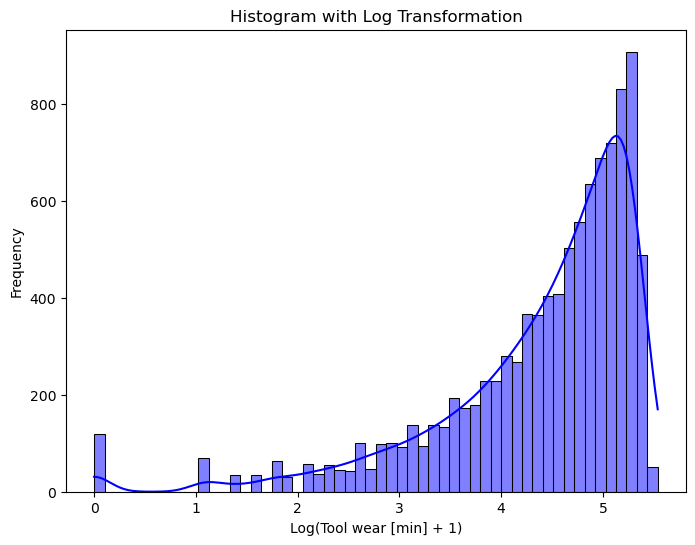

In [541]:

import numpy as np
# Apply the log transformation to the data
log_transformed_data = np.log1p(df["Tool wear [min]"])

# Create a histogram with KDE (Kernel Density Estimation)
plt.figure(figsize=(8, 6))
sns.histplot(log_transformed_data, kde=True, color='blue', edgecolor='black')

# Customize the plot (optional)
plt.title('Histogram with Log Transformation')
plt.xlabel('Log(Tool wear [min] + 1)')  # Adding 1 to avoid log(0)
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [542]:
#here after log transformation the distribution becomes left skewed 
#the peak is not flat this time

# Outlier detection

In [543]:
#we can use boxplot method for outlier detection and treatment

In [544]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

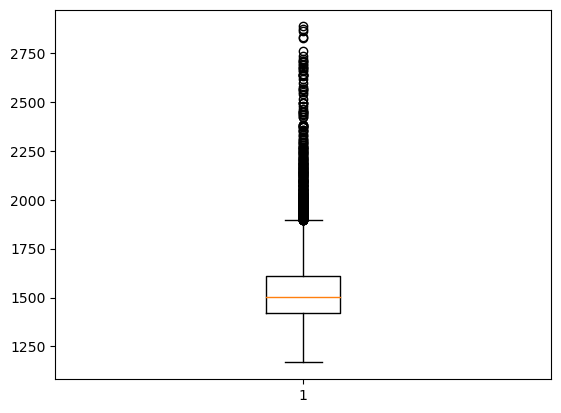

In [545]:
plt.boxplot(df["Rotational speed [rpm]"])
plt.show()

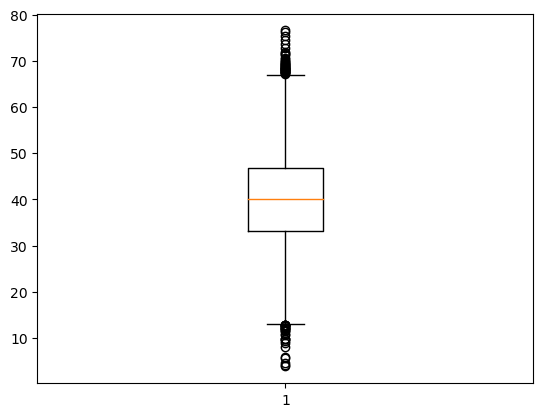

In [546]:
plt.boxplot(df["Torque [Nm]"])
plt.show()

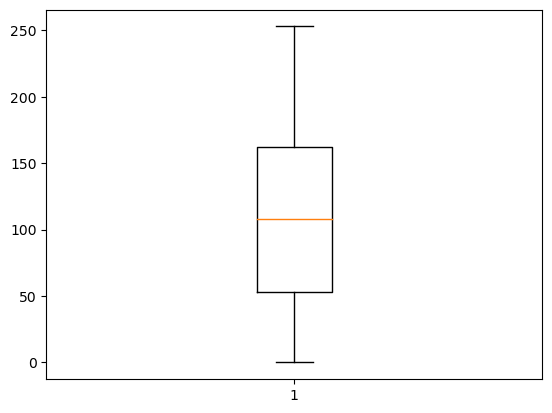

In [547]:
plt.boxplot(df["Tool wear [min]"])
plt.show()

# Outlier treatment

In [548]:
# user defined fn for outlier treatment
def remove_outlier(d,c):
    # d is variable for dataframe c for column
    
    # find q1 and q3
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    
    #find iqr=q3-q1
    iqr=q3-q1
    
    # find upper bound and lb
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    # filter good data (ie eliminate outliers)
    good_data=d[(d[c]<=ub) & (d[c]>=lb)]
    
    return good_data

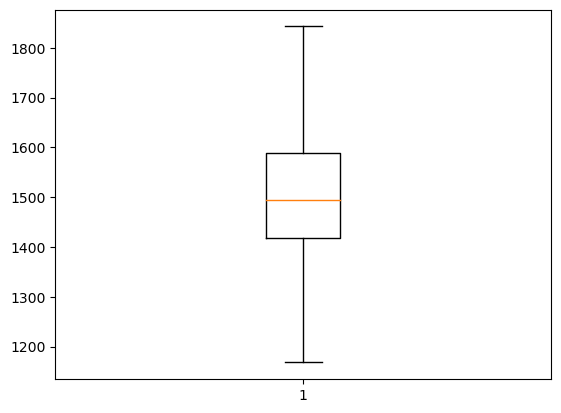

In [553]:
# remove outlies from Rotational speed
df=remove_outlier(df,"Rotational speed [rpm]")
plt.boxplot(df["Rotational speed [rpm]"])
plt.show()

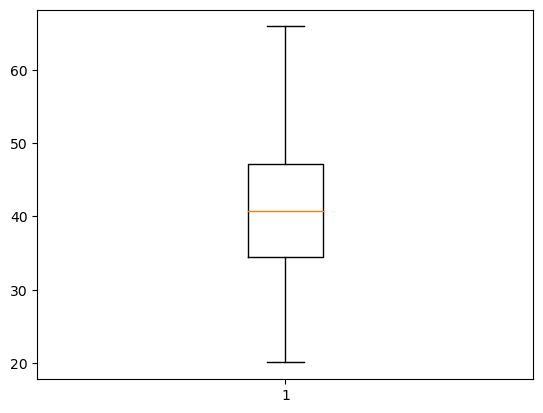

In [554]:
# remove outlies from Torque
df=remove_outlier(df,"Torque [Nm]")
plt.boxplot(df["Torque [Nm]"])
plt.show()

In [555]:
df.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [556]:
df["Failure Type"].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [557]:
#here the "Failure Type" is categorical variable, it contains diffferent categories we can encode them into numbers

In [558]:
df["Failure Type"]=df["Failure Type"].replace(["No Failure","Power Failure","Tool Wear Failure","Overstrain Failure","Random Failures","Heat Dissipation Failure"],[0,1,2,3,4,5])

In [559]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0
2,L,298.1,308.5,1498,49.4,5,0,0
3,L,298.2,308.6,1433,39.5,7,0,0
4,L,298.2,308.7,1408,40.0,9,0,0


# Feature Engineering

In [560]:
# extract all the numerical data from the dataframe df and create a new data frame df_numeric

In [561]:
df_numeric=df.select_dtypes(include=["int64","float64"])

In [562]:
df_numeric

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,298.1,308.6,1551,42.8,0,0,0
1,298.2,308.7,1408,46.3,3,0,0
2,298.1,308.5,1498,49.4,5,0,0
3,298.2,308.6,1433,39.5,7,0,0
4,298.2,308.7,1408,40.0,9,0,0
...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0
9996,298.9,308.4,1632,31.8,17,0,0
9997,299.0,308.6,1645,33.4,22,0,0
9998,299.0,308.7,1408,48.5,25,0,0


<Axes: >

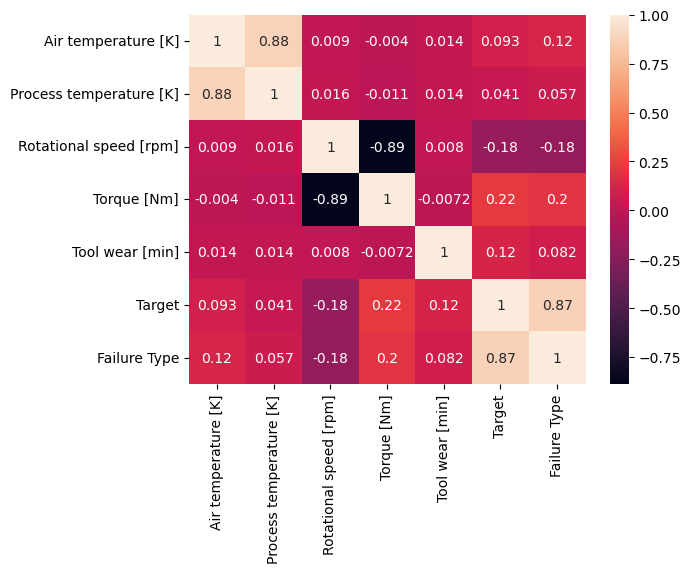

In [563]:
corr=df_numeric.corr()
sns.heatmap(corr,annot=True)

In [564]:
# we can plot heatmap to understand correlation between different variables
# here the Air temperature [K] and Process temperature [K] are highly correlated
# the strength is 0.88 and direction is positive ie there is a strong positive correlation between these two variables
#the rotational speed and torque both are negatively correlated,with strength of 0.89 
#for all the other variables the correlation is very less
#the target variables "Target" and "Failure Type" both are also positively correlated with a strength of 0.87 

In [565]:
#extracting the categorical features
df_categorical=df.select_dtypes(include="object")

In [566]:
df_categorical

,Type
0,M
1,L
2,L
3,L
4,L
...,...
9995,M
9996,H
9997,M
9998,H


# One hot encoding

In [567]:

# to convert the categorical features to numerical features

In [568]:

dummy=pd.get_dummies(df_categorical,drop_first=True)

In [569]:
dummy

,Type_L,Type_M
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,0
9997,0,1
9998,0,0


In [570]:
# combining both the data frames
df=pd.concat([dummy,df_numeric],axis=1)

In [571]:
df.head()

,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,0,1,298.1,308.6,1551,42.8,0,0,0
1,1,0,298.2,308.7,1408,46.3,3,0,0
2,1,0,298.1,308.5,1498,49.4,5,0,0
3,1,0,298.2,308.6,1433,39.5,7,0,0
4,1,0,298.2,308.7,1408,40.0,9,0,0


In [572]:

#here we are considering both "Target" and "Failure Type" as outputs
# for the firat analysis we can consider "Target" as our output

In [573]:
new_df=df.drop("Failure Type",axis=1)

In [574]:
new_df.head()

,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,0,1,298.1,308.6,1551,42.8,0,0
1,1,0,298.2,308.7,1408,46.3,3,0
2,1,0,298.1,308.5,1498,49.4,5,0
3,1,0,298.2,308.6,1433,39.5,7,0
4,1,0,298.2,308.7,1408,40.0,9,0


In [575]:
#storing input variables in x and output variables in y

In [576]:
x=new_df.drop("Target",axis=1)

In [577]:
x

,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0,1,298.1,308.6,1551,42.8,0
1,1,0,298.2,308.7,1408,46.3,3
2,1,0,298.1,308.5,1498,49.4,5
3,1,0,298.2,308.6,1433,39.5,7
4,1,0,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...,...
9995,0,1,298.8,308.4,1604,29.5,14
9996,0,0,298.9,308.4,1632,31.8,17
9997,0,1,299.0,308.6,1645,33.4,22
9998,0,0,299.0,308.7,1408,48.5,25


In [578]:
y=new_df["Target"]

In [579]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 9385, dtype: int64

# train test samples

In [580]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)

# Over Sampling 

<Axes: xlabel='Target', ylabel='count'>

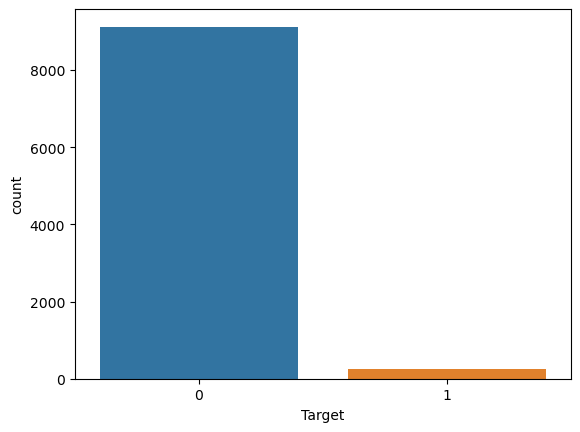

In [581]:
sns.countplot(data=new_df,x="Target")

In [582]:
#this plot clearly shoes that the data is a imbalanced one
# here the target contains two categories 0 for "no failure" and 1 for "failure", the number of instances in  failure is very less 
#compared to no failure, this shows a class imbalance 
# we can avoid this condition by Random oversampling , here the number of instances in minority class is increasing or duplicating t
#the existing records

In [583]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate the chosen oversampling method
oversampler = RandomOverSampler()  # Use the appropriate one

# Apply oversampling to the training data
#You should not perform oversampling on the testing set, as it should reflect the real distribution of the data.
x_train_resampled, y_train_resampled = oversampler.fit_resample(xtrain, ytrain)


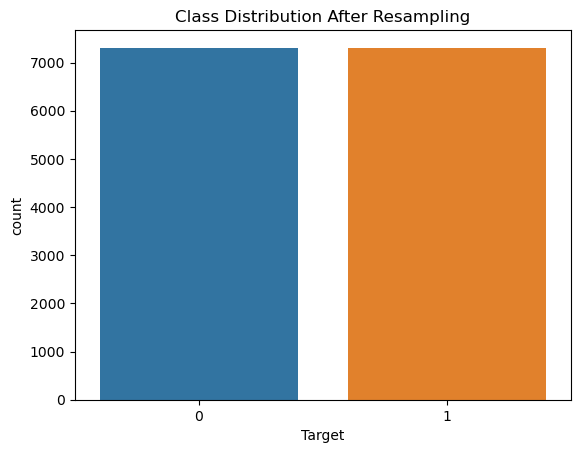

In [584]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to visualize the class distribution
sns.countplot(data=pd.DataFrame({'Target': y_train_resampled}), x="Target")
plt.title("Class Distribution After Resampling")
plt.show()


In [585]:
# here both the classes are balanced after randomsampling

# Random Forest Classifier

In [586]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib.cm import rainbow
import numpy as np

# Create Random forest classifier 
rfc = RandomForestClassifier(random_state=0)

# Train the classifier on the resampled training data
rfc.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=0)

In [587]:
#predict y 
rfc_predicted=rfc.predict(xtest)

In [588]:
# check scores
rfc_accuracy=accuracy_score(ytest,rfc_predicted)
rfc_precision=precision_score(ytest,rfc_predicted)
rfc_recall=recall_score(ytest,rfc_predicted)
rfc_fscore=f1_score(ytest,rfc_predicted)

In [589]:
#Update accuracy table
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["RFC",rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,RFC,0.982952,0.864865,0.542373,0.666667


In [590]:
rf_scores = []
estimators = [10,100,1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(x_train_resampled, y_train_resampled)
    rf_scores.append(rf_classifier.score(xtest, ytest))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

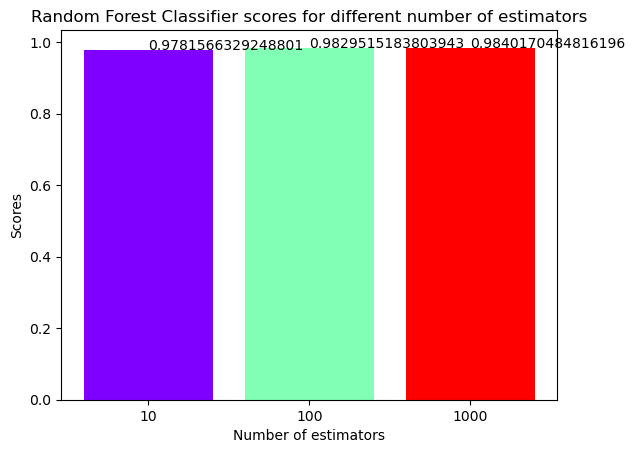

In [591]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [592]:
#here it shows the accuracy score for different estimators
#for all estimators the score is 0.98
# the f1  score is little low,which is the harmonic mean of precision and recall
# the model is performing well on the test and training samples

# Logistic regression

In [593]:
#creating regression model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [594]:
#traing the model
logreg.fit(x_train_resampled,y_train_resampled)

LogisticRegression()

In [595]:
#predicting the y_target
pred_y=logreg.predict(xtest)

In [596]:
#checking the accuraccy of model
logreg.score(xtest,ytest)

0.8044752264251465

In [597]:
# check scores
lr_accuracy=accuracy_score(ytest,pred_y)
lr_precision=precision_score(ytest,pred_y)
lr_recall=recall_score(ytest,pred_y)
lr_fscore=f1_score(ytest,pred_y)

In [598]:
#Update accuracy table
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["RFC",rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore],
     ["LR",lr_accuracy,lr_precision,lr_recall,lr_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,RFC,0.982952,0.864865,0.542373,0.666667
1,LR,0.804475,0.120690,0.830508,0.210753


In [599]:
#compared to randomforest classifier the accuracy of logistic regression model is less
#the f1 score is also very low for this model

# Decision Tree

In [600]:
#import decision tree classifier library 
from sklearn.tree import DecisionTreeClassifier

In [601]:
dt_scores = []
for i in range(1, len(x.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(x_train_resampled, y_train_resampled)
    dt_scores.append(dt_classifier.score(xtest, ytest))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

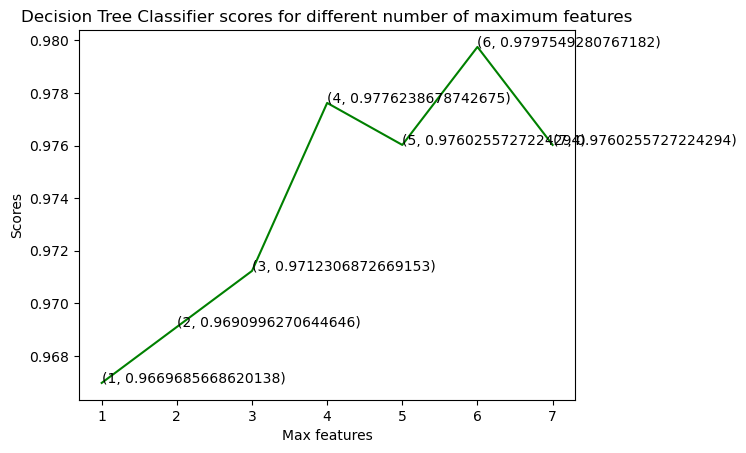

In [602]:
plt.plot([i for i in range(1, len(x.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(x.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [603]:
dt_classifier.fit(x_train_resampled, y_train_resampled)
pred_dt=dt_classifier.predict(xtest)

In [604]:
# check scores
dt_accuracy=accuracy_score(ytest,pred_dt)
dt_precision=precision_score(ytest,pred_dt)
dt_recall=recall_score(ytest,pred_dt)
dt_fscore=f1_score(ytest,pred_dt)

In [605]:
#Update accuracy table
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["RFC",rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore],
     ["LR",lr_accuracy,lr_precision,lr_recall,lr_fscore],
     ["DT",dt_accuracy,dt_precision,dt_recall,dt_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,RFC,0.982952,0.864865,0.542373,0.666667
1,LR,0.804475,0.120690,0.830508,0.210753
2,DT,0.976026,0.629630,0.576271,0.601770


In [606]:
#for decision tree classifier also the accuracy is 0.98 and there is a good balance between precision, recall and f1 score
#here it shows the maximum accuracy for the model with 7 features

# KNN Classifier

In [607]:
from sklearn.neighbors import KNeighborsClassifier

In [608]:
#create model object
knn=KNeighborsClassifier(n_neighbors=5,metric="euclidean")

In [609]:
# fit knn model
knn.fit(x_train_resampled,y_train_resampled)

KNeighborsClassifier(metric='euclidean')

In [610]:
#predict y using knn
knn_predicted=knn.predict(xtest)

In [611]:
# check scores
knn_accuracy=accuracy_score(ytest,knn_predicted)
knn_precision=precision_score(ytest,knn_predicted)
knn_recall=recall_score(ytest,knn_predicted)
knn_fscore=f1_score(ytest,knn_predicted)

In [612]:
#Update accuracy table
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["RFC",rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore],
     ["LR",lr_accuracy,lr_precision,lr_recall,lr_fscore],
     ["DT",dt_accuracy,dt_precision,dt_recall,dt_fscore],
     ["KNN",knn_accuracy,knn_precision,knn_recall,knn_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,RFC,0.982952,0.864865,0.542373,0.666667
1,LR,0.804475,0.120690,0.830508,0.210753
2,DT,0.976026,0.629630,0.576271,0.601770
3,KNN,0.927544,0.210526,0.474576,0.291667


In [613]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train_resampled, y_train_resampled)
    knn_scores.append(knn_classifier.score(xtest, ytest))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

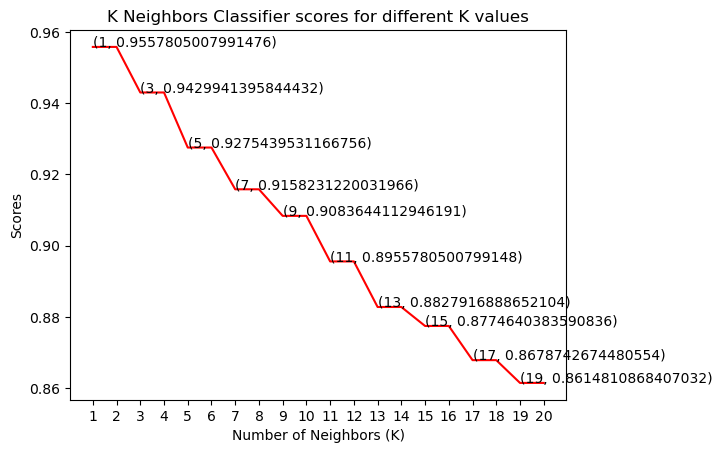

In [614]:
# knn_scores is assumed to be a list of scores for different K values
# Label every 4th point on the plot with its corresponding (K, score) value
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21,2):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [615]:
#here the model has good performance score of 0.93
#but other metrics which defines the performance of the model are very less
#the model has the highest score with 1 nearest neighbor data point and the accuracy is decreasing as the value of k increases

# SVM

In [616]:
#Support Vector Machine (SVC: Support Vector Classifier)
from sklearn.svm import SVC
#create an instance of SVM
svm = SVC(kernel='linear')
#Fit the model
svm.fit(x_train_resampled,y_train_resampled)
#Predict the response from xtest
svm_predicted=svm.predict(xtest)
#check scores
svm_accuracy=accuracy_score(ytest, svm_predicted)
svm_precision=precision_score(ytest, svm_predicted)
svm_recall=recall_score(ytest, svm_predicted)
svm_fscore=f1_score(ytest, svm_predicted)

In [617]:
#Update accuracy table
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["RFC",rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore],
     ["LR",lr_accuracy,lr_precision,lr_recall,lr_fscore],
     ["DT",dt_accuracy,dt_precision,dt_recall,dt_fscore],
     ["KNN",knn_accuracy,knn_precision,knn_recall,knn_fscore],
     ["SVM",svm_accuracy,svm_precision,svm_recall,svm_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,RFC,0.982952,0.864865,0.542373,0.666667
1,LR,0.804475,0.120690,0.830508,0.210753
2,DT,0.976026,0.629630,0.576271,0.601770
3,KNN,0.927544,0.210526,0.474576,0.291667
4,SVM,0.750666,0.099804,0.864407,0.178947


In [618]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train_resampled, y_train_resampled)
    svc_scores.append(svc_classifier.score(xtest, ytest))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

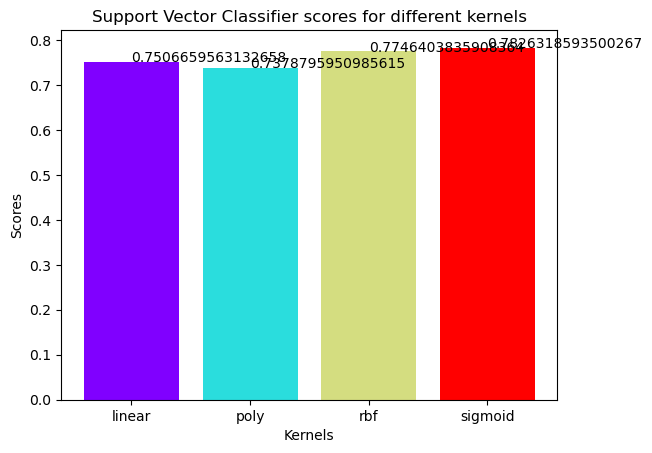

In [619]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [620]:
# here in the above plot we used different kernals to find accuracy score of the model
#comparing different kernals the the model with sigmoid kernalshows higher acuracy
#but precision and f1 score of the model is very less

In [621]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Train the classifier on the resampled training data
svm = SVC(kernel='linear')
#Fit the model
svm.fit(x_train_resampled,y_train_resampled)
#Predict the response from xtest
train_predictions=svm.predict(x_train_resampled)
test_predictions=svm.predict(xtest)

# Evaluate performance on the training data
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
train_precision = precision_score(y_train_resampled, train_predictions)
train_recall = recall_score(y_train_resampled, train_predictions)
train_fscore = f1_score(y_train_resampled, train_predictions)

# Evaluate performance on the test data
test_accuracy = accuracy_score(ytest, test_predictions)
test_precision = precision_score(ytest, test_predictions)
test_recall = recall_score(ytest, test_predictions)
test_fscore = f1_score(ytest, test_predictions)

# Create a DataFrame to compare performance on training and test data
col = ['Dataset', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
data = [["Training", train_accuracy, train_precision, train_recall, train_fscore],
        ["Test", test_accuracy, test_precision, test_recall, test_fscore]]
comparison_df = pd.DataFrame(data, columns=col)

# Print the DataFrame to compare training and test performance
print(comparison_df)


    Dataset  Accuracy  Precision    Recall  F1-Score
0  Training  0.833653   0.796955  0.895443  0.843333
1      Test  0.750666   0.099804  0.864407  0.178947


In [622]:
#here the model is performing well on both test and trainig sample 
#there is a case of overfitting, but there is no large difference between the accuracy of model on training and test sample 
#so the effect of overfitting is very less

In [623]:
#comparing all the models Radom forest classifier model and decision tree model are showing good accuracy,precision,recall and f1 score

# Using selected features

In [ ]:
# In previous histogram it shows that "Air temperature [K]" and "Process temperature [K]" are highly correlated so we can remove these
#features to improve the accuracy

In [671]:
df.head()

,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,0,1,298.1,308.6,1551,42.8,0,0,0
1,1,0,298.2,308.7,1408,46.3,3,0,0
2,1,0,298.1,308.5,1498,49.4,5,0,0
3,1,0,298.2,308.6,1433,39.5,7,0,0
4,1,0,298.2,308.7,1408,40.0,9,0,0


In [672]:
new_df1=df.drop(["Air temperature [K]","Process temperature [K]"],axis=1)

In [673]:
new_df1

,Type_L,Type_M,Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,0,1,1551,42.8,0,0,0
1,1,0,1408,46.3,3,0,0
2,1,0,1498,49.4,5,0,0
3,1,0,1433,39.5,7,0,0
4,1,0,1408,40.0,9,0,0
...,...,...,...,...,...,...,...
9995,0,1,1604,29.5,14,0,0
9996,0,0,1632,31.8,17,0,0
9997,0,1,1645,33.4,22,0,0
9998,0,0,1408,48.5,25,0,0


In [674]:
new_df1=new_df1.drop("Failure Type",axis=1)

In [675]:
new_df1.head()

,Type_L,Type_M,Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,0,1,1551,42.8,0,0
1,1,0,1408,46.3,3,0
2,1,0,1498,49.4,5,0
3,1,0,1433,39.5,7,0
4,1,0,1408,40.0,9,0


In [676]:
x=new_df1.drop("Target",axis=1)

In [677]:
x

,Type_L,Type_M,Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0,1,1551,42.8,0
1,1,0,1408,46.3,3
2,1,0,1498,49.4,5
3,1,0,1433,39.5,7
4,1,0,1408,40.0,9
...,...,...,...,...,...
9995,0,1,1604,29.5,14
9996,0,0,1632,31.8,17
9997,0,1,1645,33.4,22
9998,0,0,1408,48.5,25


In [678]:
y=new_df1["Target"]

In [679]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 9385, dtype: int64

# Train Test Samples

In [680]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

<Axes: xlabel='Target', ylabel='count'>

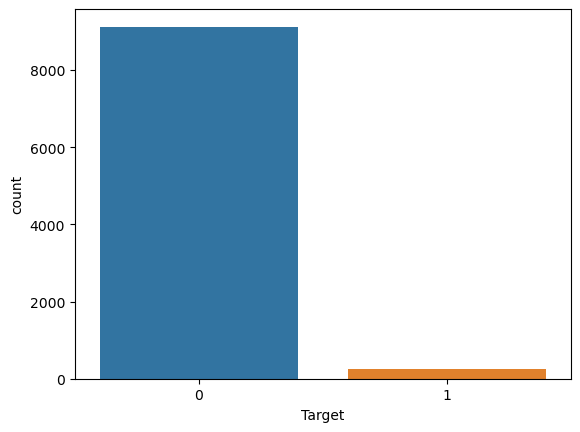

In [684]:
sns.countplot(data=new_df,x="Target")

# Random Over sampling

In [685]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate the chosen oversampling method
oversampler = RandomOverSampler()  # Use the appropriate one

# Apply oversampling to the training data
#You should not perform oversampling on the testing set, as it should reflect the real distribution of the data.
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)


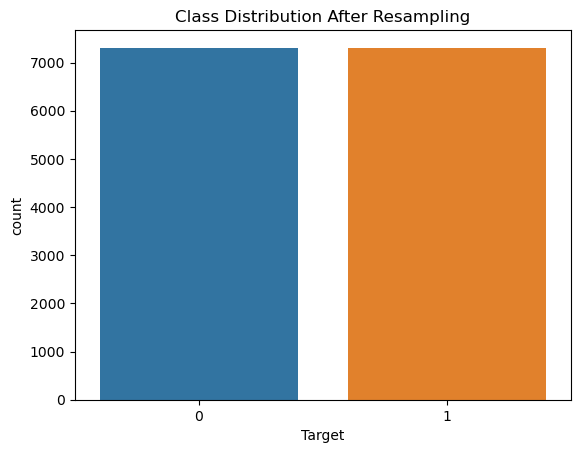

In [686]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to visualize the class distribution
sns.countplot(data=pd.DataFrame({'Target': y_train_resampled}), x="Target")
plt.title("Class Distribution After Resampling")
plt.show()


In [ ]:
# here both the classes are balanced after Random sampling

# Random Forest

In [640]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib.cm import rainbow
import numpy as np

# Create Random forest classifier 
rfc = RandomForestClassifier(random_state=0)

# Train the classifier on the resampled training data
rfc.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=0)

In [641]:
#predict y 
rfc_predicted=rfc.predict(x_test)

In [642]:
# check scores
rfc_accuracy=accuracy_score(y_test,rfc_predicted)
rfc_precision=precision_score(y_test,rfc_predicted)
rfc_recall=recall_score(y_test,rfc_predicted)
rfc_fscore=f1_score(y_test,rfc_predicted)

In [643]:
#Update accuracy table
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["RFC",rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,RFC,0.972829,0.611111,0.372881,0.463158


In [644]:
rf_scores = []
estimators = [10,100,1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(x_train_resampled, y_train_resampled)
    rf_scores.append(rf_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

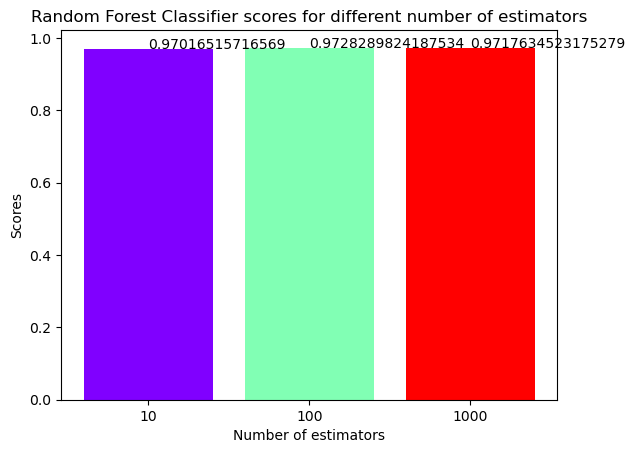

In [645]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [ ]:
#here it shows the accuracy score for different estimators
#for all estimators the score is 0.97
# the f1  score and recall are little low,which is the harmonic mean of precision and recall
# the model is performing well on the test and training samples

# Logistic Regression

In [646]:
#creating regression model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [647]:
#traing the model
logreg.fit(x_train_resampled,y_train_resampled)

LogisticRegression()

In [648]:
#predicting the y_target
pred_y=logreg.predict(x_test)

In [649]:
pred_y

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [650]:
#checking the accuraccy of model
logreg.score(x_test,y_test)

0.7618540223761321

In [651]:
# check scores
lr_accuracy=accuracy_score(y_test,pred_y)
lr_precision=precision_score(y_test,pred_y)
lr_recall=recall_score(y_test,pred_y)
lr_fscore=f1_score(y_test,pred_y)

In [652]:
#Update accuracy table
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["RFC",rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore],
     ["LR",lr_accuracy,lr_precision,lr_recall,lr_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,RFC,0.972829,0.611111,0.372881,0.463158
1,LR,0.761854,0.099174,0.813559,0.176796


In [ ]:
#compared to RFC regression model showing low accuracy and comparitively small f1 score and prrecision

# Decision Tree

In [653]:
#import decision tree classifier library 
from sklearn.tree import DecisionTreeClassifier

In [654]:
dt_scores = []
for i in range(1, len(x.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(x_train_resampled, y_train_resampled)
    dt_scores.append(dt_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

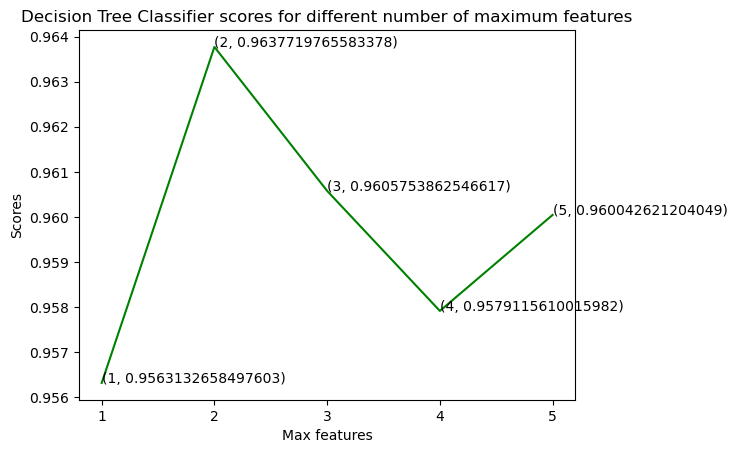

In [655]:
plt.plot([i for i in range(1, len(x.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(x.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [656]:
dt_classifier.fit(x_train_resampled, y_train_resampled)
pred_dt=dt_classifier.predict(x_test)

In [657]:
# check scores
dt_accuracy=accuracy_score(y_test,pred_dt)
dt_precision=precision_score(y_test,pred_dt)
dt_recall=recall_score(y_test,pred_dt)
dt_fscore=f1_score(y_test,pred_dt)

In [658]:
#Update accuracy table
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["RFC",rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore],
     ["LR",lr_accuracy,lr_precision,lr_recall,lr_fscore],
     ["DT",dt_accuracy,dt_precision,dt_recall,dt_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,RFC,0.972829,0.611111,0.372881,0.463158
1,LR,0.761854,0.099174,0.813559,0.176796
2,DT,0.960043,0.362069,0.355932,0.358974


In [ ]:
# In DT the accuracy is quite high and there is a balance between precision,recall,f1 csore
# here Decision tree with 2 max features show high performance accuracy 0.963


# KNN Classifier

In [659]:
from sklearn.neighbors import KNeighborsClassifier

In [660]:
#create model object
knn=KNeighborsClassifier(n_neighbors=5,metric="euclidean")

In [661]:
# fit knn model
knn.fit(x_train_resampled,y_train_resampled)

KNeighborsClassifier(metric='euclidean')

In [662]:
#predict y using knn
knn_predicted=knn.predict(x_test)

In [663]:
# check scores
knn_accuracy=accuracy_score(y_test,knn_predicted)
knn_precision=precision_score(y_test,knn_predicted)
knn_recall=recall_score(y_test,knn_predicted)
knn_fscore=f1_score(y_test,knn_predicted)

In [664]:
#Update accuracy table
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["RFC",rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore],
     ["LR",lr_accuracy,lr_precision,lr_recall,lr_fscore],
     ["DT",dt_accuracy,dt_precision,dt_recall,dt_fscore],
     ["KNN",knn_accuracy,knn_precision,knn_recall,knn_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,RFC,0.972829,0.611111,0.372881,0.463158
1,LR,0.761854,0.099174,0.813559,0.176796
2,DT,0.960043,0.362069,0.355932,0.358974
3,KNN,0.931273,0.230769,0.508475,0.317460


In [665]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train_resampled, y_train_resampled)
    knn_scores.append(knn_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

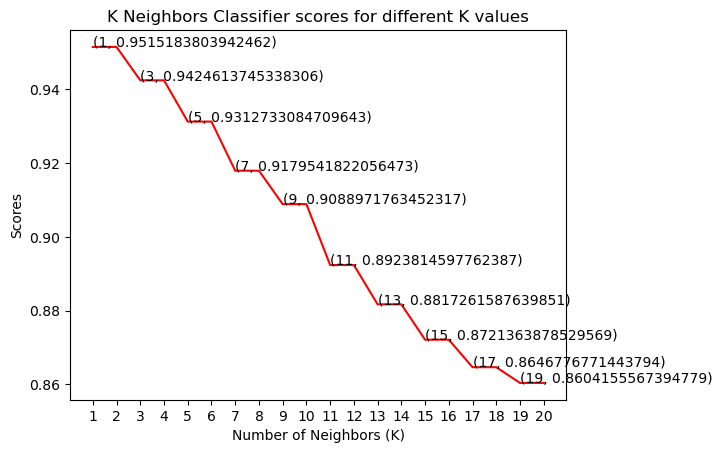

In [666]:
# knn_scores is assumed to be a list of scores for different K values
# Label every 4th point on the plot with its corresponding (K, score) value
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21,2):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
#In KNN  a line chart is plot and it shows the acccuracy for different values of k 
# here the model  with 1 nearest neighbor shows high accuracy 0.95
#as the value of k increases the accuracy is decreasing

# SVM

In [667]:
#Support Vector Machine (SVC: Support Vector Classifier)
from sklearn.svm import SVC
#create an instance of SVM
svm = SVC(kernel='linear')
#Fit the model
svm.fit(x_train_resampled,y_train_resampled)
#Predict the response from xtest
svm_predicted=svm.predict(x_test)
#check scores
svm_accuracy=accuracy_score(y_test, svm_predicted)
svm_precision=precision_score(y_test, svm_predicted)
svm_recall=recall_score(y_test, svm_predicted)
svm_fscore=f1_score(y_test, svm_predicted)

In [668]:
#Update accuracy table
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["RFC",rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore],
     ["LR",lr_accuracy,lr_precision,lr_recall,lr_fscore],
     ["DT",dt_accuracy,dt_precision,dt_recall,dt_fscore],
     ["KNN",knn_accuracy,knn_precision,knn_recall,knn_fscore],
     ["SVM",svm_accuracy,svm_precision,svm_recall,svm_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,RFC,0.972829,0.611111,0.372881,0.463158
1,LR,0.761854,0.099174,0.813559,0.176796
2,DT,0.960043,0.362069,0.355932,0.358974
3,KNN,0.931273,0.230769,0.508475,0.317460
4,SVM,0.777304,0.101996,0.779661,0.180392


In [669]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train_resampled, y_train_resampled)
    svc_scores.append(svc_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

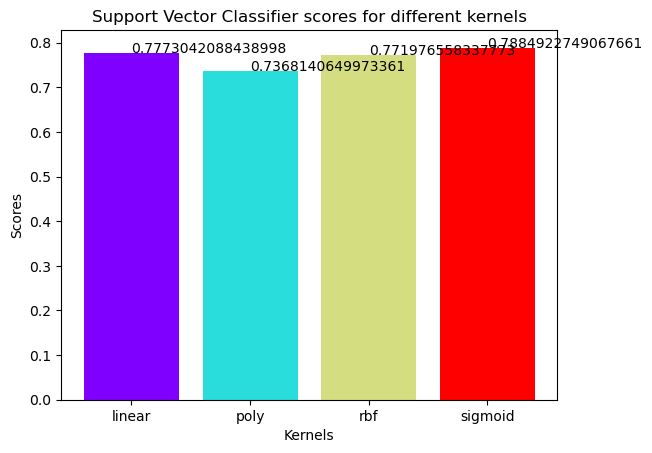

In [670]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [ ]:
#the perormance accuracy generated by SVM is quite low compared to others 
#for different kernals it shows different accuracy
#in the bar plot it shows that the model with sigmoid kernal the accuracy is high ccompared to other kernals